In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import functions_mem


# Load data 

In [2]:
df = pd.read_parquet("/Users/julianeoliveira/Downloads/aesop_2026_01_09_mun.parquet")


# Select a city

In [3]:
df[df.nm_uf == 'Amazonas'].co_ibge.unique()

array([130002, 130006, 130008, 130010, 130014, 130020, 130030, 130040,
       130050, 130060, 130063, 130068, 130070, 130080, 130083, 130090,
       130100, 130110, 130115, 130120, 130130, 130140, 130150, 130160,
       130165, 130170, 130180, 130185, 130190, 130195, 130200, 130210,
       130220, 130230, 130240, 130250, 130255, 130260, 130270, 130280,
       130290, 130300, 130310, 130320, 130330, 130340, 130350, 130353,
       130356, 130360, 130370, 130380, 130390, 130395, 130400, 130406,
       130410, 130420, 130423, 130426, 130430, 130440], dtype=int32)

In [4]:
print(df[df.co_ibge == 130002].nm_municipio.unique())

['Alvarães']


In [42]:
#df[df.nm_municipio == 'São Paulo']

In [5]:
lst = ['co_ibge', 'epiyear', 'epiweek','year_week', 'atend_totais', 'atend_ivas']

set_muni = df[df.co_ibge == 130002][lst]



#  Baseline and Epidemic threshold

In [6]:
lst_sea = [2022, 2023, 2024] #2020, 2021,2017, 2018, 2019,

In [7]:
baseline,  post_baseline, epidemic_threshold, post_threshold, df_thresholds_intensity = functions_mem.baseline_thresholds(set_muni, lst_sea)



In [8]:
baseline

111.91428571428571

In [9]:
post_baseline

117.53260869565217

In [10]:
epidemic_threshold

192.97676313265367

In [11]:
post_threshold

324.77252333368074

In [12]:
df_thresholds_intensity

,percentile,value
0,50%,220.887330
1,90%,257.462127
2,95%,268.891603


# Figures

In [13]:
set_muni = set_muni[(set_muni.epiyear >= 2022)]

In [14]:
summary, details = functions_mem.mem_epidemic_period(set_muni, delta=0.02)

In [16]:
summary

,epiyear,r_j_estr,k_start,k_end
0,2022,0,1,0
1,2023,17,22,38
2,2024,15,12,26
3,2025,26,6,31


In [78]:
#fig, ax = plt.subplots(figsize=(12,6))

#dta_plot = set_muni[230:300]
        
# plot weekly values
#ax.plot(dta_plot["year_week"], dta_plot['atend_ivas'], marker="o", label="Weekly atend_ivas")
                
# labels
#plt.xticks(rotation=90)
#ax.set_xlabel("Epidemiological Week")
#ax.set_ylabel("atend_ivas")
#ax.legend()
#plt.tight_layout()
#plt.show()

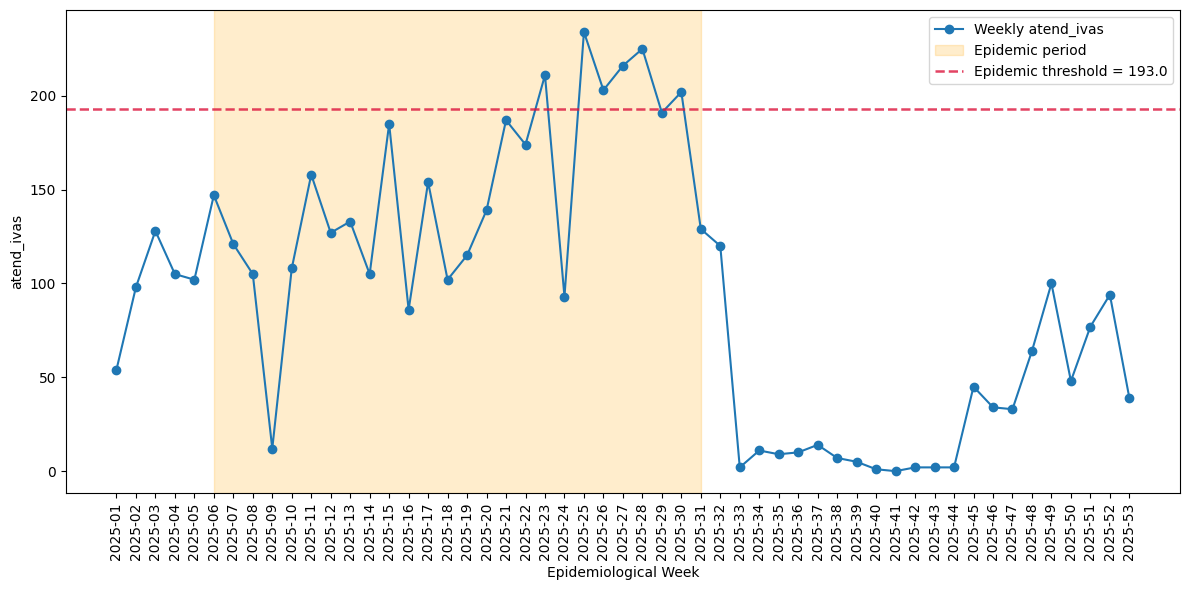

In [23]:
fig, ax = plt.subplots(figsize=(12,6))

year = 2025

season = set_muni[set_muni.epiyear == year].reset_index()

k_s = summary[summary.epiyear == year].k_start.max()

k_e = summary[summary.epiyear == year].k_end.max()
        
# plot weekly values
ax.plot(season["year_week"], season['atend_ivas'], marker="o", label="Weekly atend_ivas")
        
# highlight epidemic window
ax.axvspan(season.loc[k_s-1, "year_week"], season.loc[k_e-1, "year_week"], #k_s-1 e k_e-1
                   color="orange", alpha=0.2, label="Epidemic period")

ax.axhline(epidemic_threshold, color="crimson", alpha=0.8, linestyle="--", linewidth=1.8,
           label=f"Epidemic threshold = {round(epidemic_threshold,0)}")
        
        
# labels
plt.xticks(rotation=90)
ax.set_xlabel("Epidemiological Week")
ax.set_ylabel("atend_ivas")
ax.legend()
plt.tight_layout()
plt.show()

In [21]:
epidemic_threshold, post_threshold

(192.97676313265367, 324.77252333368074)

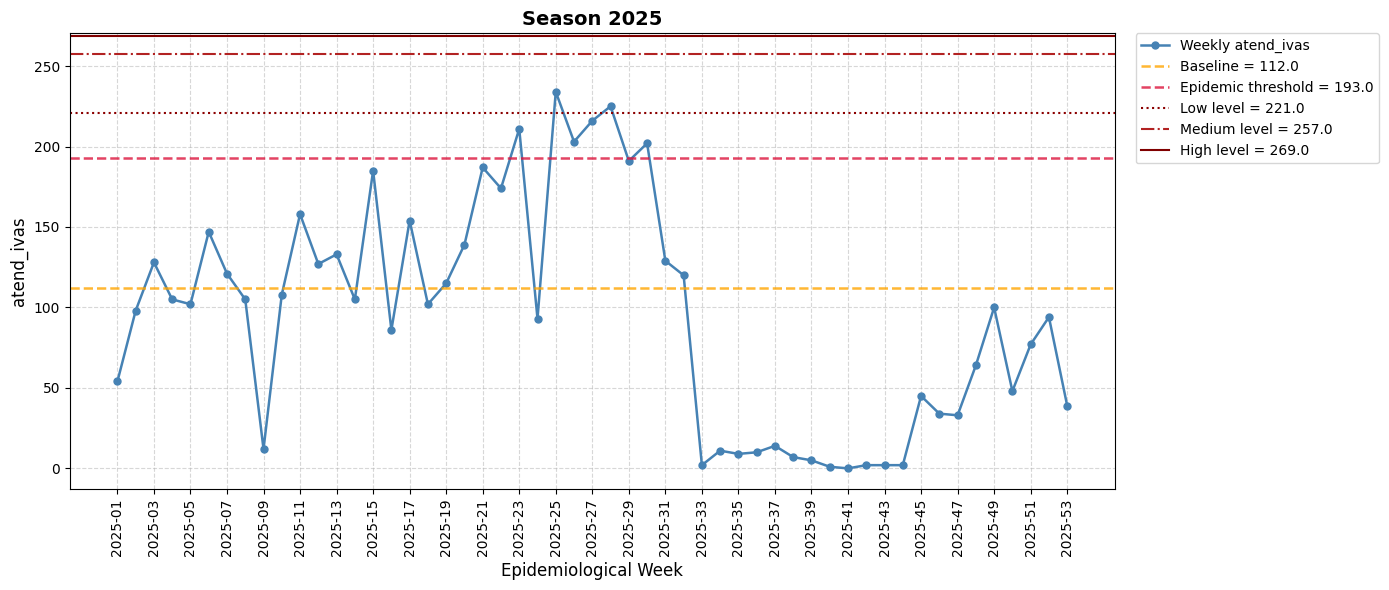

In [22]:
fig, ax = plt.subplots(figsize=(14,6))

year = 2025

# subset the season data
season = set_muni[set_muni.epiyear == year].reset_index(drop=True)

# get start and end from summary
k_s = int(summary.loc[summary.epiyear == year, "k_start"].iloc[0])
k_e = int(summary.loc[summary.epiyear == year, "k_end"].iloc[0])

# plot weekly values
ax.plot(season["year_week"], season['atend_ivas'], 
        marker="o", markersize=5, linewidth=1.8, color="steelblue", 
        label="Weekly atend_ivas")

# thresholds
ax.axhline(baseline, color="orange", alpha=0.8, linestyle="--", linewidth=1.8,
           label=f"Baseline = {round(baseline,0)}")

#ax.axhline(post_baseline, color="orange", alpha=0.8, linestyle="--", linewidth=1.8,
#           label=f"Post - Baseline = {round(post_baseline,0)}")


ax.axhline(epidemic_threshold, color="crimson", alpha=0.8, linestyle="--", linewidth=1.8,
           label=f"Epidemic threshold = {round(epidemic_threshold,0)}")

#ax.axhline(post_threshold, color="crimson", alpha=0.8, linestyle="--", linewidth=1.8,
#           label=f"Epidemic threshold = {round(post_threshold,0)}")


ax.axhline(df_thresholds_intensity.value.iloc[0], color="darkred", linestyle=":", linewidth=1.5,
           label=f"Low level = {round(df_thresholds_intensity.value.iloc[0],0)}")
ax.axhline(df_thresholds_intensity.value.iloc[1], color="firebrick", linestyle="-.", linewidth=1.5,
           label=f"Medium level = {round(df_thresholds_intensity.value.iloc[1],0)}")
ax.axhline(df_thresholds_intensity.value.iloc[2], color="maroon", linestyle="-", linewidth=1.5,
           label=f"High level = {round(df_thresholds_intensity.value.iloc[2],0)}")

# labels & formatting
ax.set_xlabel("Epidemiological Week", fontsize=12)
ax.set_ylabel("atend_ivas", fontsize=12)
ax.set_title(f"Season {year}", fontsize=14, fontweight="bold")

# x-axis ticks (reduce clutter)
ax.set_xticks(season["year_week"][::2])  # every 2 weeks
ax.set_xticklabels(season["year_week"][::2], rotation=90)

# grid
ax.grid(True, linestyle="--", alpha=0.5)

# legend outside
ax.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

plt.tight_layout()
plt.show()
